In [ ]:
'''
Here is some of our data preprocessing. We were first just geting ourselves
familiar with the dataset and getting a glimpse of how many samples
per class. 
'''

import json
import os

# File and directory paths
json_file_path = 'archive/annotation_dict.json'
directory_path = 'archive/examples'

try:
    # load the json data
    with open(json_file_path, 'r') as f:
        annotations_dict = json.load(f)
except FileNotFoundError:
    print(f"Error: JSON file not found at {json_file_path}")
    exit()
except json.JSONDecodeError as e:
    print(f"Error: Invalid JSON in {json_file_path}: {e}")
    exit()
except Exception as e:
    print(f"Error: An unexpected error occurred while reading the JSON file: {e}")
    exit()

# get all the mp4 files from directory
try:
    mp4_files = [f for f in os.listdir(directory_path) if f.lower().endswith(".mp4")]
except FileNotFoundError:
    print(f"Error: Directory not found: {directory_path}")
    exit()
except Exception as e:
    print(f"Error accessing directory: {e}")
    exit()

# extract base filenames for comparison
mp4_files_base = [os.path.splitext(f)[0] for f in mp4_files]

# gets the keys from json data
json_keys = set(annotations_dict.keys())

# checking for missing annotations
label_status = {}
for mp4_file in mp4_files_base:
    label_status[mp4_file] = mp4_file in json_keys

# count the files that have labels and without them
labeled_count = sum(label_status.values())
unlabeled_count = len(label_status) - labeled_count
total_count = len(label_status)

'''
for mp4_file, has_label in label_status.items():
    if has_label:
        #print(f"MP4 file '{mp4_file}' has a label.")
        pass
    else:
        #print(f"MP4 file '{mp4_file}' does not have a label.")
        pass
'''


#prints the counts of the mp4 files
print(f"\nTotal MP4 files: {total_count}")
print(f"MP4 files with labels: {labeled_count}")
print(f"MP4 files without labels: {unlabeled_count}")

# count the occurrences of each class label
label_counts = {}
for video_id, label in annotations_dict.items():
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

print("\nClass Label Counts:")
for label, count in label_counts.items():
    print(f"Label {label}: {count}")



Total MP4 files: 37201
MP4 files with labels: 37085
MP4 files without labels: 116

Class Label Counts:
Label 9: 11749
Label 8: 6490
Label 0: 996
Label 3: 3490
Label 6: 3866
Label 2: 5924
Label 7: 712
Label 5: 2362
Label 1: 1070
Label 4: 426


In [ ]:
'''
Here we are downsampling the dataset. Since the dataset is undersampled we decided to reduce
the size of the dataset down to the minority class for each class. So the smallest class has 
426 samples so we decided to reduce every class down to that size. We know that is probably
not optimal for creating the best possible model because we would want the most amount of data to train 
on; however, for our purposes we decided it would be best because it will allow us to get through
training faster. 

'''


import json
import os
import shutil
from collections import defaultdict

# path of downsampled data
json_file_path = 'archive/annotation_dict.json'
mp4_directory = 'archive/examples'
output_directory = 'archive/downsampled_data'  # new directory
samples_per_class = 426

try:
    # load json data
    with open(json_file_path, 'r') as f:
        annotations_dict = json.load(f)
except FileNotFoundError:
    print(f"Error: JSON file not found at {json_file_path}")
    exit()
except json.JSONDecodeError as e:
    print(f"Error: Invalid JSON in {json_file_path}: {e}")
    exit()
except Exception as e:
    print(f"Error: An unexpected error occurred while reading the JSON file: {e}")
    exit()

# create new output directory
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
else:
    print(f"Warning: Output directory '{output_directory}' already exists.  Files may be overwritten.")

# new dict for downsampled data
downsampled_annotations = {}
# counter for each class
class_counts = defaultdict(int)
#keep track of the number of files copied
files_copied_count = 0

# iter through annotiations
for video_id, label in annotations_dict.items():
    # check if we already selected this label
    if class_counts[label] < samples_per_class:
        # Construct the path to the MP4 file.
        mp4_file_name = video_id + ".mp4"  # changed from .MP4
        mp4_file_path = os.path.join(mp4_directory, mp4_file_name)

        # construct new path to mp4
        new_mp4_file_path = os.path.join(output_directory, mp4_file_name)

        # copy mp4 file to output direcotry
        try:
            shutil.copy2(mp4_file_path, new_mp4_file_path)
            files_copied_count += 1
        except FileNotFoundError:
            print(f"Error: MP4 file not found at {mp4_file_path}.  Skipping.")
            continue 
        except Exception as e:
            print(f"Error: Could not copy MP4 file: {e}")
            continue 
        # Add the annotation to the downsampled annotations dictionary.
        downsampled_annotations[video_id] = label
        class_counts[label] += 1

# Save the downsampled annotations to a new json file in the output directory.
new_json_file_path = os.path.join(output_directory, "downsampled_annotations.json")
try:
    with open(new_json_file_path, 'w') as f:
        json.dump(downsampled_annotations, f, indent=4)
except Exception as e:
    print(f"Error writing downsampled JSON: {e}")
    exit()

print(f"Downsampling complete.")
print(f"{files_copied_count} MP4 files copied to '{output_directory}'.")
print(f"Downsampled annotations saved to '{new_json_file_path}'.")
print(f"New JSON structure: {list(downsampled_annotations.items())[:2]}...") # prints sample


Downsampling complete.
4260 MP4 files copied to 'archive/downsampled_data'.
Downsampled annotations saved to 'archive/downsampled_data\downsampled_annotations.json'.
New JSON structure: [('0014297', 9), ('0024339', 8)]...


In [ ]:
import json
from collections import defaultdict

# Path to the downsampled JSON annotation file
json_file_path = 'archive/downsampled_annotations.json'

try:
    # laod json file data
    with open(json_file_path, 'r') as f:
        annotations_dict = json.load(f)
except FileNotFoundError:
    print(f"Error: JSON file not found at {json_file_path}")
    exit()
except json.JSONDecodeError as e:
    print(f"Error: Invalid JSON in {json_file_path}: {e}")
    exit()
except Exception as e:
    print(f"Error: An unexpected error occurred while reading the JSON file: {e}")
    exit()

# count occurence of each class
label_counts = defaultdict(int)
for video_id, label in annotations_dict.items():
    label_counts[label] += 1

# print class label counts
print("Class Label Counts in Downsampled Data:")
for label, count in label_counts.items():
    print(f"Label {label}: {count}")


Class Label Counts in Downsampled Data:
Label 9: 426
Label 8: 426
Label 0: 426
Label 3: 426
Label 6: 426
Label 2: 426
Label 7: 426
Label 5: 426
Label 1: 426
Label 4: 426


In [ ]:
import torch

# check if CUDA is available
if torch.cuda.is_available():
    # name of GPU
    gpu_name = torch.cuda.get_device_name(0)
    print(f"CUDA is available. Training will be done on GPU: {gpu_name}")

    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")

    device = torch.device("cuda")
else:
    print("CUDA is not available. Training will be done on CPU. This will be much slower.")
    device = torch.device("cpu")


CUDA is available. Training will be done on GPU: NVIDIA GeForce GTX 1050 Ti
Number of GPUs available: 1


In [1]:
import torch
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version (torch.version.cuda):", torch.version.cuda)
print("cuDNN Available:", torch.backends.cudnn.is_available())
print("cuDNN Version:", torch.backends.cudnn.version())
print("Number of GPUs Available:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU Name (0):", torch.cuda.get_device_name(0))

PyTorch Version: 2.7.0+cu128
CUDA Available: True
CUDA Version (torch.version.cuda): 12.8
cuDNN Available: True
cuDNN Version: 90701
Number of GPUs Available: 1
GPU Name (0): NVIDIA GeForce RTX 2060 SUPER


Processing 4260 video annotations...
Class distribution:
Class 0: 426 samples
Class 1: 426 samples
Class 2: 426 samples
Class 3: 426 samples
Class 4: 426 samples
Class 5: 426 samples
Class 6: 426 samples
Class 7: 426 samples
Class 8: 426 samples
Class 9: 426 samples
Creating video dataset...
Total dataset size: 4260
Training set size: 3408
Validation set size: 852
Number of classes: 10
Creating model...
Starting training...
Using device: cuda


Evaluating: 100%|██████████| 426/426 [00:37<00:00, 11.41it/s]


Epoch 1/20:
  Train Loss: 2.2124, Train Acc: 0.1781
  Val Loss: 2.0514, Val Acc: 0.2570
  Learning rate: 0.000100


Evaluating: 100%|██████████| 426/426 [00:40<00:00, 10.52it/s]


Epoch 2/20:
  Train Loss: 2.0187, Train Acc: 0.2790
  Val Loss: 1.9688, Val Acc: 0.2911
  Learning rate: 0.000100


Evaluating: 100%|██████████| 426/426 [00:41<00:00, 10.36it/s]


Epoch 3/20:
  Train Loss: 1.9065, Train Acc: 0.3275
  Val Loss: 1.9401, Val Acc: 0.3275
  Learning rate: 0.000100


Evaluating: 100%|██████████| 426/426 [00:38<00:00, 11.00it/s]


Epoch 4/20:
  Train Loss: 1.7880, Train Acc: 0.3647
  Val Loss: 1.8825, Val Acc: 0.3286
  Learning rate: 0.000100


Evaluating: 100%|██████████| 426/426 [00:38<00:00, 11.01it/s]


Epoch 5/20:
  Train Loss: 1.6320, Train Acc: 0.4381
  Val Loss: 1.8094, Val Acc: 0.3803
  Learning rate: 0.000100


Evaluating: 100%|██████████| 426/426 [00:37<00:00, 11.48it/s]


Epoch 6/20:
  Train Loss: 1.4481, Train Acc: 0.5015
  Val Loss: 1.7776, Val Acc: 0.3991
  Learning rate: 0.000100


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.91it/s]


Epoch 7/20:
  Train Loss: 1.2465, Train Acc: 0.5546
  Val Loss: 1.8311, Val Acc: 0.3862
  Learning rate: 0.000100


Evaluating: 100%|██████████| 426/426 [00:40<00:00, 10.43it/s]


Epoch 8/20:
  Train Loss: 1.0479, Train Acc: 0.6359
  Val Loss: 1.8303, Val Acc: 0.3920
  Learning rate: 0.000100


Evaluating: 100%|██████████| 426/426 [00:40<00:00, 10.64it/s]


Epoch 9/20:
  Train Loss: 0.8481, Train Acc: 0.7019
  Val Loss: 1.9222, Val Acc: 0.4085
  Learning rate: 0.000050


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.90it/s]


Epoch 10/20:
  Train Loss: 0.6268, Train Acc: 0.7823
  Val Loss: 1.9449, Val Acc: 0.4096
  Learning rate: 0.000050


Evaluating: 100%|██████████| 426/426 [00:38<00:00, 11.15it/s]


Epoch 11/20:
  Train Loss: 0.5380, Train Acc: 0.8190
  Val Loss: 2.1554, Val Acc: 0.3979
  Learning rate: 0.000050


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.68it/s]


Epoch 12/20:
  Train Loss: 0.4373, Train Acc: 0.8474
  Val Loss: 2.1880, Val Acc: 0.4038
  Learning rate: 0.000025


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.66it/s]


Epoch 13/20:
  Train Loss: 0.3483, Train Acc: 0.8809
  Val Loss: 2.3236, Val Acc: 0.4143
  Learning rate: 0.000025


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.92it/s]


Epoch 14/20:
  Train Loss: 0.3062, Train Acc: 0.8961
  Val Loss: 2.3933, Val Acc: 0.4085
  Learning rate: 0.000025


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.87it/s]


Epoch 15/20:
  Train Loss: 0.2765, Train Acc: 0.9046
  Val Loss: 2.4558, Val Acc: 0.4085
  Learning rate: 0.000013


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.90it/s]


Epoch 16/20:
  Train Loss: 0.2419, Train Acc: 0.9193
  Val Loss: 2.5114, Val Acc: 0.4249
  Learning rate: 0.000013


Evaluating: 100%|██████████| 426/426 [00:42<00:00, 10.02it/s]


Epoch 17/20:
  Train Loss: 0.2349, Train Acc: 0.9196
  Val Loss: 2.5914, Val Acc: 0.4284
  Learning rate: 0.000013


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.69it/s]


Epoch 18/20:
  Train Loss: 0.2040, Train Acc: 0.9346
  Val Loss: 2.5769, Val Acc: 0.4155
  Learning rate: 0.000006


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.78it/s]


Epoch 19/20:
  Train Loss: 0.1879, Train Acc: 0.9378
  Val Loss: 2.6989, Val Acc: 0.4261
  Learning rate: 0.000006


Evaluating: 100%|██████████| 426/426 [00:39<00:00, 10.68it/s]


Epoch 20/20:
  Train Loss: 0.1790, Train Acc: 0.9407
  Val Loss: 2.7751, Val Acc: 0.4249
  Learning rate: 0.000006
Loaded best model with validation accuracy: 0.4284


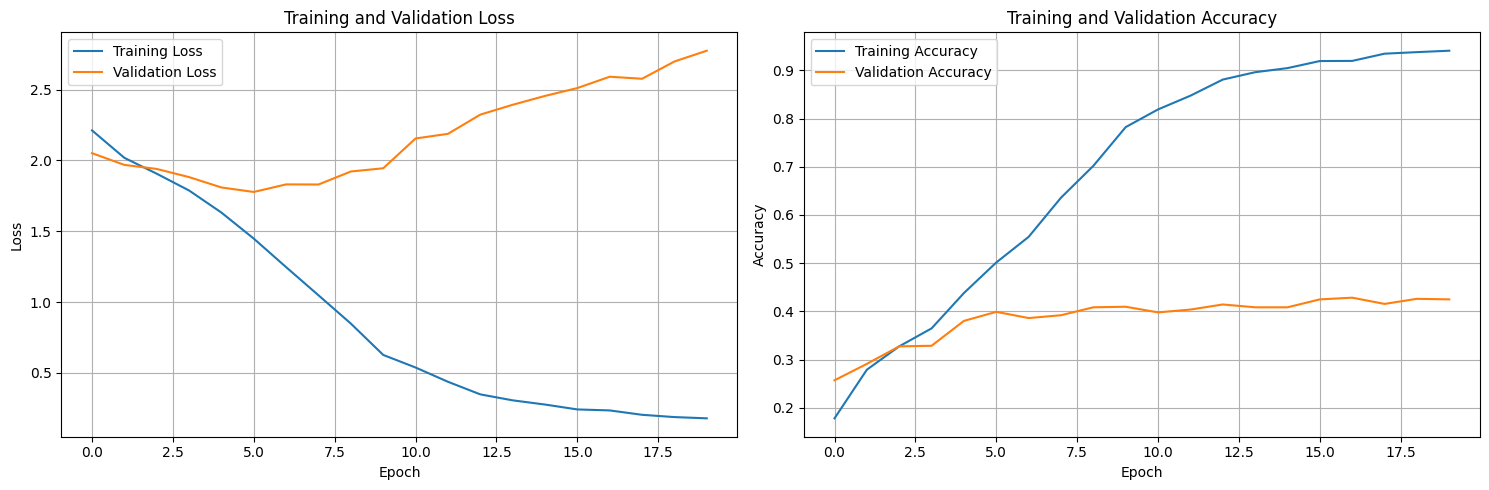


Final evaluation on validation set:


Testing: 100%|██████████| 426/426 [00:38<00:00, 11.06it/s]



Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.49      0.47        93
           1       0.27      0.34      0.30        74
           2       0.48      0.34      0.40        85
           3       0.40      0.40      0.40        77
           4       0.55      0.64      0.59        89
           5       0.31      0.33      0.32        86
           6       0.36      0.30      0.32        81
           7       0.49      0.43      0.46        96
           8       0.62      0.51      0.56        91
           9       0.36      0.44      0.40        80

    accuracy                           0.42       852
   macro avg       0.43      0.42      0.42       852
weighted avg       0.43      0.42      0.43       852



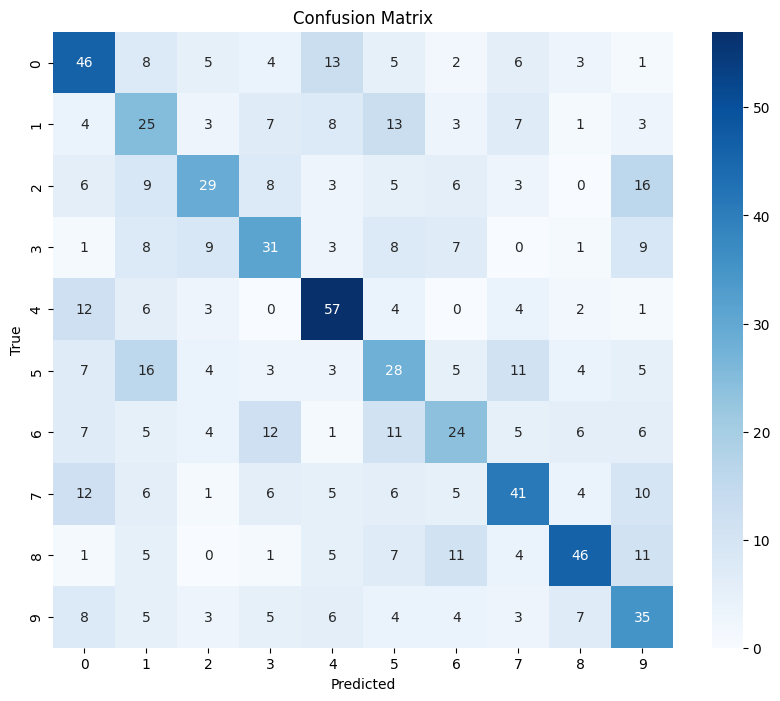

Validation accuracy: 0.4249
Model saved to video_classifier2.pth


In [ ]:
import os
import json
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import gc 

# File paths
mp4_directory = "archive/downsampled_data"
json_file_path = "archive/downsampled_annotations.json"

# Memory optimization parameters
target_resolution = (112, 80)  # reducing size to make training move faster. otherwise takes way longer to run
num_frames = 16  #num frames per video
batch_size = 2  # small batch size to help with memory

class VideoDataset(Dataset):
    """Custom dataset for video classification that loads videos on-the-fly"""
    
    def __init__(self, video_paths, labels, num_frames=16, target_resolution=(112, 80), transform=None):
        self.video_paths = video_paths
        self.labels = labels
        self.num_frames = num_frames
        self.target_resolution = target_resolution
        self.transform = transform
    
    def __len__(self):
        return len(self.video_paths)
    
    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        label = self.labels[idx]
        
        # extract frames
        frames = self.extract_video_frames(video_path)
        
        # If frames could not be extracted, return a dummy tensor with zeros
        if frames is None:
            dummy_frames = np.zeros((self.num_frames, self.target_resolution[1], self.target_resolution[0], 3), dtype=np.uint8)
            frames_tensor = torch.tensor(dummy_frames, dtype=torch.float32).permute(3, 0, 1, 2) / 255.0
            return frames_tensor, label
        
        # Convert to tensor [C, D, H, W]
        frames_tensor = torch.tensor(np.array(frames), dtype=torch.float32).permute(3, 0, 1, 2) / 255.0
        
        # apply transofrmations
        if self.transform:
            frames_tensor = self.transform(frames_tensor)
        
        return frames_tensor, label
    
    def extract_video_frames(self, video_path, max_frames=None):
        """Extract frames from a video file"""
        if max_frames is None:
            max_frames = self.num_frames
            
        frames = []
        try:
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Error opening video {video_path}")
                return None
            
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames == 0:
                print(f"Error: video {video_path} has zero frames")
                return None
                
            # adjusting number of rames
            num_frames_to_extract = min(max_frames, total_frames)
            frame_indices = np.linspace(0, total_frames - 1, num_frames_to_extract, dtype=int)
            
            for i in frame_indices:
                cap.set(cv2.CAP_PROP_POS_FRAMES, i)
                ret, frame = cap.read()
                if not ret:
                    print(f"Error: Could not read frame {i} from {video_path}")
                    cap.release()
                    return None
                
                # resizing frame and pixel values
                frame = cv2.resize(frame, self.target_resolution)
                frames.append(frame)
                
            cap.release()
            return frames
            
        except Exception as e:
            print(f"Exception processing {video_path}: {e}")
            return None

def prepare_data():
    """Load annotations and prepare paths and labels for creating datasets"""
    try:
        with open(json_file_path, "r") as f:
            annotations = json.load(f)
    except Exception as e:
        print(f"Error loading annotations: {e}")
        return None, None, None
    
    video_paths = []
    labels = []
    video_ids = []
    
    print(f"Processing {len(annotations)} video annotations...")
    
    for video_id, label in annotations.items():
        video_path = os.path.join(mp4_directory, video_id + ".mp4")
        if os.path.exists(video_path):
            video_paths.append(video_path)
            labels.append(label)
            video_ids.append(video_id)
    
    # gets the class distribution
    unique_classes, counts = np.unique(labels, return_counts=True)
    print("Class distribution:")
    for cls, count in zip(unique_classes, counts):
        print(f"Class {cls}: {count} samples")
    
    return video_paths, labels, video_ids

# model  class
class VideoClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(VideoClassifier, self).__init__()
        
        # convolutional layers with fewer filters
        self.conv1 = nn.Conv3d(3, 16, kernel_size=(3, 3, 3), padding=1)
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=1)
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)
        self.conv3 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=1)
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)
        
        # Calculate the flattened features size
        # For 16 frames at 112x80 resolution after pooling layers
        self.fc_input_size = self._calculate_flatten_size()
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.fc_input_size, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)
        
        self.relu = nn.ReLU()
    
    def _calculate_flatten_size(self):
        # Calculate based on input size of (3, 16, 112, 80)
        # After conv1 + pool1: (16, 16, 56, 40)
        # After conv2 + pool2: (32, 8, 28, 20)
        # After conv3 + pool3: (64, 4, 14, 10)
        return 64 * 4 * 14 * 10
    
    def forward(self, x):
        # Apply convolutions and pooling
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = self.pool3(self.relu(self.conv3(x)))
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Apply fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        
        return x

def train_model(model, train_loader, val_loader, num_epochs=5, learning_rate=0.0001):
    """Train the model with memory-efficient processing"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)
    
    # For tracking metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    best_val_accuracy = 0.0
    best_model_state = None
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # stats
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            #clears GPU for space
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
        
        # Calculate training metrics
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # validation phase
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        #learning rate scheduler step
        scheduler.step(val_loss)
        
        # saving best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_state = model.state_dict().copy()
        
        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"  Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")
        print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        print(f"  Learning rate: {optimizer.param_groups[0]['lr']:.6f}")
        
        # Force garbage collection
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"Loaded best model with validation accuracy: {best_val_accuracy:.4f}")
    
    # plots traiing curves
    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    
    return model

def evaluate_model(model, data_loader, criterion=None, device=None):
    """Evaluate model on the provided data loader"""
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    if criterion is None:
        criterion = nn.CrossEntropyLoss()
    
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Freeing memory
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
    
    avg_loss = running_loss / len(data_loader)
    accuracy = correct / total
    
    return avg_loss, accuracy

def test_model_detailed(model, test_loader, class_names=None):
    """Perform detailed testing with metrics and confusion matrix"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())
            
            # freeing memoory
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
    
    # calculating confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    
    #generates a classification report
    if class_names is None:
        class_names = [str(i) for i in range(len(np.unique(all_labels)))]
    
    report = classification_report(all_labels, all_predictions, target_names=class_names)
    print("\nClassification Report:")
    print(report)
    
    # plotting confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    plt.show()
    
    # returns the overall accuracy
    accuracy = np.mean(np.array(all_predictions) == np.array(all_labels))
    return accuracy

def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    """Plot training and validation metrics"""
    # creates a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot losses
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    # plots the accuracies
    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.savefig('training_curves.png')
    plt.tight_layout()
    plt.show()

def save_model(model, filename='video_classifier2.pth'):
    """Save the trained model to disk"""
    torch.save({
        'model_state_dict': model.state_dict(),
        'model_architecture': str(model),
    }, filename)
    print(f"Model saved to {filename}")

if __name__ == "__main__":
    # preparing data paths
    video_paths, labels, video_ids = prepare_data()
    
    if not video_paths:
        print("Failed to prepare data. Exiting.")
        exit(1)
    
    # creating the dataset
    print("Creating video dataset...")
    dataset = VideoDataset(video_paths, labels, num_frames=num_frames, target_resolution=target_resolution)
    
    # splitting dataset
    dataset_size = len(dataset)
    train_size = int(0.8 * dataset_size)
    val_size = dataset_size - train_size
    
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    print(f"Total dataset size: {dataset_size}")
    print(f"Training set size: {train_size}")
    print(f"Validation set size: {val_size}")
    
    # creating data loaders with small batch size to save memory
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
    
    num_classes = len(np.unique(labels))
    print(f"Number of classes: {num_classes}")
    
    print("Creating model...")
    model = VideoClassifier(num_classes=num_classes)
    
    print("Starting training...")
    model = train_model(model, train_loader, val_loader, num_epochs=20, learning_rate=0.0001)
    
    class_names = [str(i) for i in range(6num_classes)]
    val_accuracy = test_model_detailed(model, val_loader, class_names)
    print(f"Validation accuracy: {val_accuracy:.4f}")
    
    save_model(model)

Processing 4260 video annotations...
Class distribution:
Class 0: 426 samples
Class 1: 426 samples
Class 2: 426 samples
Class 3: 426 samples
Class 4: 426 samples
Class 5: 426 samples
Class 6: 426 samples
Class 7: 426 samples
Class 8: 426 samples
Class 9: 426 samples
Training set: 3408 videos
Validation set: 852 videos
Number of classes: 10
VideoClassifierWithRegularization(
  (conv1): Conv3d(3, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (bn1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  (dropout3d_1): Dropout3d(p=0.2, inplace=False)
  (conv2): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (bn2): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool3d(kernel_size=(2, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout3d_2): Dropout3d(p=

Evaluating: 100%|██████████| 213/213 [00:40<00:00,  5.28it/s]


Epoch 1/30:
  Train Loss: 2.3846, Train Acc: 0.1221
  Val Loss: 2.2408, Val Acc: 0.2101
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.39it/s]


Epoch 2/30:
  Train Loss: 2.3560, Train Acc: 0.1221
  Val Loss: 2.2228, Val Acc: 0.1948
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:37<00:00,  5.75it/s]


Epoch 3/30:
  Train Loss: 2.3137, Train Acc: 0.1411
  Val Loss: 2.2018, Val Acc: 0.2336
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:40<00:00,  5.21it/s]


Epoch 4/30:
  Train Loss: 2.3034, Train Acc: 0.1508
  Val Loss: 2.1981, Val Acc: 0.2547
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:38<00:00,  5.58it/s]


Epoch 5/30:
  Train Loss: 2.3198, Train Acc: 0.1452
  Val Loss: 2.1959, Val Acc: 0.2347
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.36it/s]


Epoch 6/30:
  Train Loss: 2.3026, Train Acc: 0.1438
  Val Loss: 2.1820, Val Acc: 0.2394
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.35it/s]


Epoch 7/30:
  Train Loss: 2.2842, Train Acc: 0.1549
  Val Loss: 2.1665, Val Acc: 0.2430
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.34it/s]


Epoch 8/30:
  Train Loss: 2.2814, Train Acc: 0.1511
  Val Loss: 2.1612, Val Acc: 0.2535
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:43<00:00,  4.90it/s]


Epoch 9/30:
  Train Loss: 2.2654, Train Acc: 0.1587
  Val Loss: 2.1485, Val Acc: 0.2629
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:40<00:00,  5.27it/s]


Epoch 10/30:
  Train Loss: 2.2560, Train Acc: 0.1643
  Val Loss: 2.1319, Val Acc: 0.2782
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:40<00:00,  5.23it/s]


Epoch 11/30:
  Train Loss: 2.2550, Train Acc: 0.1690
  Val Loss: 2.1059, Val Acc: 0.2899
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:41<00:00,  5.14it/s]


Epoch 12/30:
  Train Loss: 2.2303, Train Acc: 0.1772
  Val Loss: 2.1147, Val Acc: 0.3016
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.38it/s]


Epoch 13/30:
  Train Loss: 2.2359, Train Acc: 0.1778
  Val Loss: 2.1023, Val Acc: 0.2934
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:40<00:00,  5.28it/s]


Epoch 14/30:
  Train Loss: 2.2185, Train Acc: 0.1928
  Val Loss: 2.0786, Val Acc: 0.3052
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:49<00:00,  4.33it/s]


Epoch 15/30:
  Train Loss: 2.2159, Train Acc: 0.1863
  Val Loss: 2.0768, Val Acc: 0.3157
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:43<00:00,  4.88it/s]


Epoch 16/30:
  Train Loss: 2.2027, Train Acc: 0.2101
  Val Loss: 2.0584, Val Acc: 0.2981
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:37<00:00,  5.62it/s]


Epoch 17/30:
  Train Loss: 2.2016, Train Acc: 0.1984
  Val Loss: 2.0486, Val Acc: 0.2993
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:38<00:00,  5.47it/s]


Epoch 18/30:
  Train Loss: 2.2004, Train Acc: 0.2136
  Val Loss: 2.0620, Val Acc: 0.2969
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:38<00:00,  5.54it/s]


Epoch 19/30:
  Train Loss: 2.1968, Train Acc: 0.2045
  Val Loss: 2.0533, Val Acc: 0.3204
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:40<00:00,  5.29it/s]


Epoch 20/30:
  Train Loss: 2.1923, Train Acc: 0.2080
  Val Loss: 2.0426, Val Acc: 0.3122
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.40it/s]


Epoch 21/30:
  Train Loss: 2.1749, Train Acc: 0.2245
  Val Loss: 2.0590, Val Acc: 0.3040
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:40<00:00,  5.24it/s]


Epoch 22/30:
  Train Loss: 2.1672, Train Acc: 0.2286
  Val Loss: 2.0282, Val Acc: 0.3192
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.38it/s]


Epoch 23/30:
  Train Loss: 2.1586, Train Acc: 0.2342
  Val Loss: 2.0238, Val Acc: 0.3228
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.41it/s]


Epoch 24/30:
  Train Loss: 2.1525, Train Acc: 0.2342
  Val Loss: 2.0121, Val Acc: 0.3333
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:35<00:00,  5.93it/s]


Epoch 25/30:
  Train Loss: 2.1622, Train Acc: 0.2347
  Val Loss: 2.0240, Val Acc: 0.3239
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.41it/s]


Epoch 26/30:
  Train Loss: 2.1471, Train Acc: 0.2374
  Val Loss: 2.0005, Val Acc: 0.3322
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.36it/s]


Epoch 27/30:
  Train Loss: 2.1491, Train Acc: 0.2418
  Val Loss: 2.0057, Val Acc: 0.3239
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.41it/s]


Epoch 28/30:
  Train Loss: 2.1608, Train Acc: 0.2289
  Val Loss: 1.9967, Val Acc: 0.3263
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:40<00:00,  5.25it/s]


Epoch 29/30:
  Train Loss: 2.1444, Train Acc: 0.2356
  Val Loss: 1.9880, Val Acc: 0.3345
  Learning rate: 0.000100


Evaluating: 100%|██████████| 213/213 [00:39<00:00,  5.37it/s]


Epoch 30/30:
  Train Loss: 2.1379, Train Acc: 0.2403
  Val Loss: 1.9912, Val Acc: 0.3251
  Learning rate: 0.000100
Loaded best model with validation accuracy: 0.3345


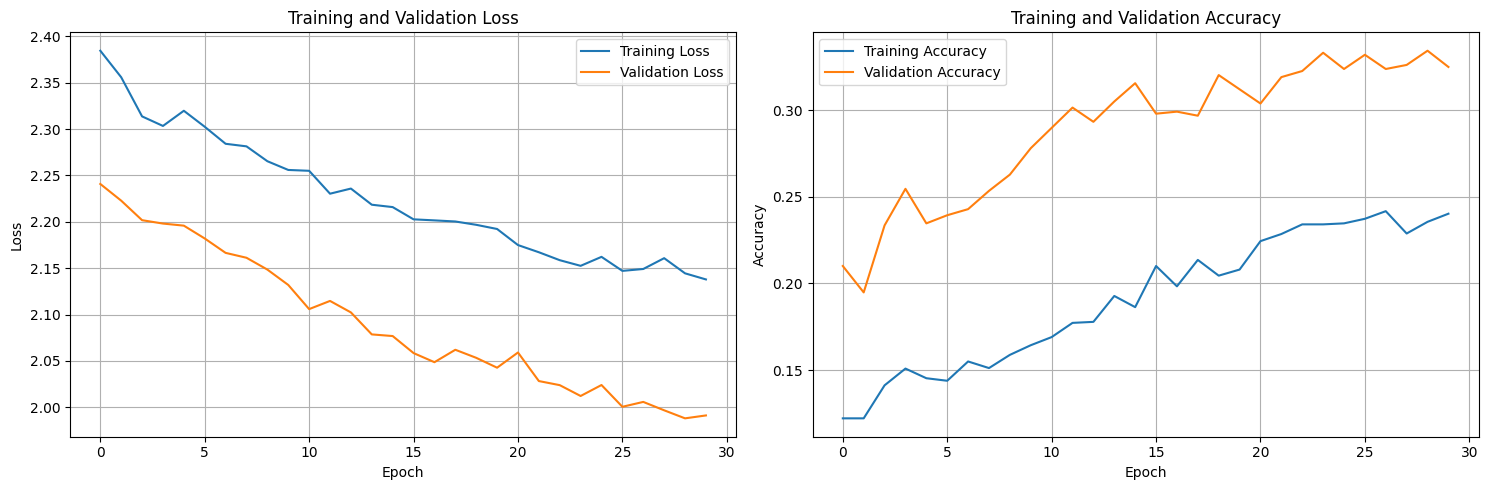

Model saved to video_classifier3.pth


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import random
import numpy as np

# Adding regularization to the model here

class VideoClassifierWithRegularization(nn.Module):
    def __init__(self, num_classes=10, dropout_rate=0.5):
        super(VideoClassifierWithRegularization, self).__init__()
        
        # Convolutional layers with batch normalization
        self.conv1 = nn.Conv3d(3, 16, kernel_size=(3, 3, 3), padding=1)
        self.bn1 = nn.BatchNorm3d(16)
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.dropout3d_1 = nn.Dropout3d(0.2)  # adding a dropout with .2 probability
        
        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=1)
        self.bn2 = nn.BatchNorm3d(32)
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)
        self.dropout3d_2 = nn.Dropout3d(0.3) #dropout with .3 probability here
        
        self.conv3 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=1)
        self.bn3 = nn.BatchNorm3d(64)
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)
        
        #calculate the flattened size
        self.fc_input_size = self._calculate_flatten_size()
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.fc_input_size, 256)
        self.bn_fc1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, 128)
        self.bn_fc2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(128, num_classes)
        
    def _calculate_flatten_size(self):
        # Same calculation as before for input (3, 16, 112, 80)
        return 64 * 4 * 14 * 10
    
    def forward(self, x):
        # Apply convolutions with batch normalization and dropout
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.dropout3d_1(x)
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout3d_2(x)
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # apply fully connected layers with batch normalization
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn_fc2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        
        return x


# functions for data augmentation

class VideoDataAugmentation:
    def __init__(self, p=0.5):
        self.p = p  # applying a probability for whether we are applying augmentations

        #so essentially there will be a 50 percent chance that each augmentation
        # will be applied to our copies of the data

        #we have 4 different augmentations that can be applied
        # flipping, adjusting the brightness, rotations, or resizing
        
    def __call__(self, frames_tensor):
        """Apply data augmentation to video frames tensor [C, D, H, W]"""
        # Only apply augmentations during training (when requires_grad is True)
        if not torch.is_grad_enabled():
            return frames_tensor
            
        frames = frames_tensor.clone()  # making a copy to not mess with the original
        
        # horizontal flip
        if random.random() < self.p:
            frames = torch.flip(frames, dims=[3])  # this flips the width dimension
            
        # randomly adjusting brightnesss
        if random.random() < self.p:
            brightness_factor = random.uniform(0.8, 1.2)
            frames = frames * brightness_factor
            frames = torch.clamp(frames, 0, 1)  #will keep the values between 0 and 1
            
        # this is a random rotation
        if random.random() < self.p:
            # applies rotation to each frame independetly
            C, D, H, W = frames.shape
            rotated_frames = torch.zeros_like(frames)
            
            angle = random.uniform(-15, 15)
            for d in range(D):
                # Extract frame, rotate, and put back
                frame = frames[:, d, :, :]  # [C, H, W]
                rotated = transforms.functional.rotate(frame, angle)
                rotated_frames[:, d, :, :] = rotated
                
            frames = rotated_frames
        
        # random crop and resize
        if random.random() < self.p:
            C, D, H, W = frames.shape
            # shrink image betwen 80% and 100% of size
            crop_factor = random.uniform(0.8, 1.0)
            crop_h, crop_w = int(H * crop_factor), int(W * crop_factor)
            
            # Calculate random crop position
            top = random.randint(0, H - crop_h) if H > crop_h else 0
            left = random.randint(0, W - crop_w) if W > crop_w else 0
            
            # Perform crop on each frame
            cropped_frames = torch.zeros_like(frames)
            for d in range(D):
                frame = frames[:, d, :, :]  # [C, H, W]
                cropped = transforms.functional.crop(frame, top, left, crop_h, crop_w)
                # Resize back to original dimensions
                resized = transforms.functional.resize(cropped, (H, W))
                cropped_frames[:, d, :, :] = resized
                
            frames = cropped_frames
        
        return frames


# here is the new training function with regularization as well 
#as early stoppage if the model stops improving

def train_model_with_regularization(model, train_loader, val_loader, 
                                   num_epochs=20, learning_rate=0.0001, 
                                   weight_decay=1e-4, patience=5):
    """Train the model with regularization techniques"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    model.to(device)
    
    # the optimizer will use L2 regularization
    optimizer = torch.optim.AdamW(
        model.parameters(), 
        lr=learning_rate,
        weight_decay=weight_decay  # L2 regularization
    )
    
    # Learning rate scheduler with more patience
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 'min', patience=3, factor=0.5, min_lr=1e-6
    )
    
    # using label smoothing in the loss function
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    
    # For tracking metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    best_val_accuracy = 0.0
    best_model_state = None
    no_improvement_count = 0
    
    for epoch in range(num_epochs):
        # training
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            
            # gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # clearing GPU periodically
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
        
        # Calculate training metrics
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # validation phase
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # learning rate scheduler step
        scheduler.step(val_loss)
        
        # Save best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_state = model.state_dict().copy()
            no_improvement_count = 0
        else:
            no_improvement_count += 1
        
        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"  Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")
        print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        print(f"  Learning rate: {optimizer.param_groups[0]['lr']:.6f}")
        
        # early stopping
        if no_improvement_count >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            break
        
        # garbage collection
        torch.cuda.empty_cache()
        import gc
        gc.collect()
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"Loaded best model with validation accuracy: {best_val_accuracy:.4f}")
    
    # Plot training curves
    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    
    return model


# dataset class with data augmentation

class VideoDatasetWithAugmentation(torch.utils.data.Dataset):
    """Custom dataset for video classification with data augmentation"""
    
    def __init__(self, video_paths, labels, num_frames=16, target_resolution=(112, 80), 
                 transform=None, augment=False):
        self.video_paths = video_paths
        self.labels = labels
        self.num_frames = num_frames
        self.target_resolution = target_resolution
        self.transform = transform
        self.augment = augment
        self.augmentor = VideoDataAugmentation(p=0.5) if augment else None
    
    def __len__(self):
        return len(self.video_paths)
    
    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        label = self.labels[idx]
        
        # extract frames
        frames = self.extract_video_frames(video_path)
        
        # If frames could not be extracted, return a dummy tensor with zeros
        if frames is None:
            dummy_frames = np.zeros((self.num_frames, self.target_resolution[1], 
                                     self.target_resolution[0], 3), dtype=np.uint8)
            frames_tensor = torch.tensor(dummy_frames, dtype=torch.float32).permute(3, 0, 1, 2) / 255.0
            return frames_tensor, label
        
        # convert to tensor [C, D, H, W]
        frames_tensor = torch.tensor(np.array(frames), dtype=torch.float32).permute(3, 0, 1, 2) / 255.0
        
        # apply augmentation
        if self.augment and self.augmentor is not None:
            frames_tensor = self.augmentor(frames_tensor)
        
        # apply any additional transformation
        if self.transform:
            frames_tensor = self.transform(frames_tensor)
        
        return frames_tensor, label
    
    def extract_video_frames(self, video_path, max_frames=None):
        """Extract frames from a video file (same as before)"""
        import cv2
        import numpy as np
        
        if max_frames is None:
            max_frames = self.num_frames
            
        frames = []
        try:
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Error opening video {video_path}")
                return None
            
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames == 0:
                print(f"Error: video {video_path} has zero frames")
                return None
                
            # Adjust number of frames to extract based on actual video length
            num_frames_to_extract = min(max_frames, total_frames)
            frame_indices = np.linspace(0, total_frames - 1, num_frames_to_extract, dtype=int)
            
            for i in frame_indices:
                cap.set(cv2.CAP_PROP_POS_FRAMES, i)
                ret, frame = cap.read()
                if not ret:
                    print(f"Error: Could not read frame {i} from {video_path}")
                    cap.release()
                    return None
                
                # Resize frame
                frame = cv2.resize(frame, self.target_resolution)
                frames.append(frame)
                
            cap.release()
            return frames
            
        except Exception as e:
            print(f"Exception processing {video_path}: {e}")
            return None


# main training function

def train_anti_overfitting_pipeline(video_paths, labels):
    """Complete pipeline with all anti-overfitting techniques"""
    import numpy as np
    import torch
    from torch.utils.data import DataLoader, random_split
    
    # set random seeds for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    
    # create dataset with augmentation for training
    dataset_size = len(video_paths)
    train_size = int(0.8 * dataset_size)
    val_size = dataset_size - train_size
    
    # randomly split videos and labels together
    indices = list(range(dataset_size))
    np.random.shuffle(indices)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:]
    
    train_paths = [video_paths[i] for i in train_indices]
    train_labels = [labels[i] for i in train_indices]
    val_paths = [video_paths[i] for i in val_indices]
    val_labels = [labels[i] for i in val_indices]
    
    # Cceate datasets with and without augmentation
    train_dataset = VideoDatasetWithAugmentation(
        train_paths, train_labels, 
        augment=True 
    )
    
    val_dataset = VideoDatasetWithAugmentation(
        val_paths, val_labels,
        augment=False 
    )
    
    print(f"Training set: {len(train_dataset)} videos")
    print(f"Validation set: {len(val_dataset)} videos")
    
    # create data loaders
    batch_size = 4  # increased batch size slightly
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size, 
        shuffle=True, 
        num_workers=0,
        drop_last=True  # esure consistent batch sizes for batch normalization
    )
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0
    )
    
    # get number of classes
    num_classes = len(np.unique(labels))
    print(f"Number of classes: {num_classes}")
    
    # Create model with regularization
    model = VideoClassifierWithRegularization(num_classes=num_classes)
    print(model)
    
    # train with all regularization techniques
    trained_model = train_model_with_regularization(
        model,
        train_loader, 
        val_loader,
        num_epochs=30,           # training longer but have early stoppage in place
        learning_rate=0.0001,    # lower learning rate
        weight_decay=1e-4,       # L2 strength
        patience=8               # early stopping
    )
    
    return trained_model



video_paths, labels, video_ids = prepare_data()


model = train_anti_overfitting_pipeline(video_paths, labels)


save_model(model, 'video_classifier3.pth')